In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-Eddie-PS-2/main/data/Queried_Data/co2_mm_mlo.csv")
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [3]:
df['months after March 1958'] = range(0, len(df))

In [4]:
cutoff = 333
control = df[df['months after March 1958'] < 333]
treatment = df[df['months after March 1958'] >= 333]

In [5]:
control_params = np.polyfit(control['average'], control['months after March 1958'], 1)
treatment_params = np.polyfit(treatment['average'], treatment['months after March 1958'], 1)

# Linear Plotting

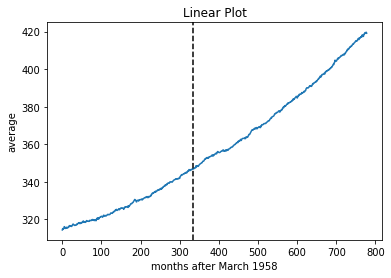

In [6]:
fig, ax = plt.subplots()

# Plot the data as a line
ax.plot( df['months after March 1958'],df['deseasonalized'])

# Add labels and a title
ax.set_xlabel('months after March 1958')
ax.set_ylabel('average')
ax.set_title('Linear Plot')
plt.axvline(x=cutoff, color='black', linestyle='--')

# Show the plot
plt.show()

<ipython-input-7-12afa56e312d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Y_pred'] = model2.predict(df2[['months after March 1958']])
<ipython-input-7-12afa56e312d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Y_pred'] = model3.predict(df3[['months after March 1958']])


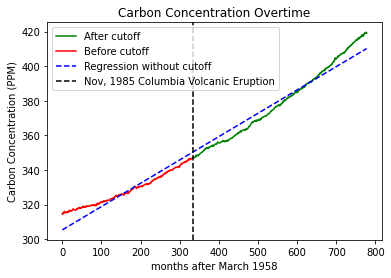

In [7]:
df1 = df.loc[df['months after March 1958'] ]
df2 = df.loc[df['months after March 1958'] > cutoff]
df3 = df.loc[df['months after March 1958'] <= cutoff ]

# Fit a linear regression model to each group of data
model1 = LinearRegression().fit(df1[['months after March 1958']], df1['deseasonalized'])
model2 = LinearRegression().fit(df2[['months after March 1958']], df2['deseasonalized'])
model3 = LinearRegression().fit(df3[['months after March 1958']], df3['deseasonalized'])

# Calculate the predicted values for each group of data
df1['Y_pred'] = model1.predict(df1[['months after March 1958']])
df2['Y_pred'] = model2.predict(df2[['months after March 1958']])
df3['Y_pred'] = model3.predict(df3[['months after March 1958']])
# Plot the data and the linear regressions
plt.plot(df2['months after March 1958'], df2['deseasonalized'], 'g', label='After cutoff')
plt.plot(df3['months after March 1958'], df3['deseasonalized'], 'r', label='Before cutoff')
plt.plot(df1['months after March 1958'], df1['Y_pred'], 'b--', label='Regression without cutoff')

plt.axvline(x=cutoff, color='black', linestyle='--', label = 'Nov, 1985 Columbia Volcanic Eruption')
# Add labels and a legend
plt.xlabel('months after March 1958')
plt.ylabel('Carbon Concentration (PPM)')
plt.title('Carbon Concentration Overtime')
plt.legend()

# Show the plot
plt.show()